<h1>Chapter 1.5.2 Harris Corner Detection</h1>

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
filename = '1.jpg'
img = cv2.imread(filename)

In [21]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


dst = cv2.cornerHarris(gray,2,3,0.1) # 3번째 인자의 값을 조정하여 분석 감도 조정(낮을수록 더 민감해짐)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows()
  cv2.imwrite('subpixel4.png',img)

<h2>Corner with SubPixel Accuracy</h2>

In [22]:
filename = '1.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.1)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows()
  cv2.imwrite('subpixel5.png',img)

/var/folders/87/9j2z9qvs5qn6xyrssn_3kl2m0000gn/T/ipykernel_75703/3134752699.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


<h2>Shi-Tomasi Corner Detector & Good Features to Track</h2>

/var/folders/87/9j2z9qvs5qn6xyrssn_3kl2m0000gn/T/ipykernel_75703/2296107072.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


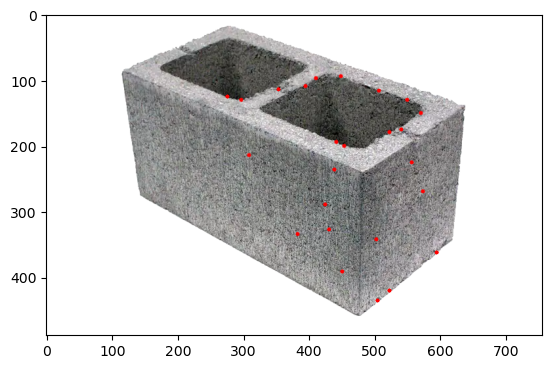

(<matplotlib.image.AxesImage at 0x15c962850>, None)

In [23]:
img = cv2.imread('block1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.05,10)
corners = np.int0(corners)

for i in corners:
  x,y = i.ravel()
  cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

<h2>SIFT in OpenCV</h2>

In [24]:
img = cv2.imread('corner2.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
img=cv2.drawKeypoints(gray,kp,img)

cv2.imwrite('sift_keypoints.jpg',img)

True

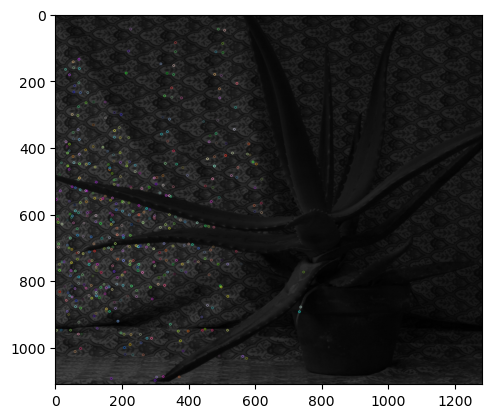

(<matplotlib.image.AxesImage at 0x15ffa3ca0>, None)

In [25]:
img = cv2.imread('view1.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
img=cv2.drawKeypoints(gray,kp,img)

plt.imshow(img),plt.show()

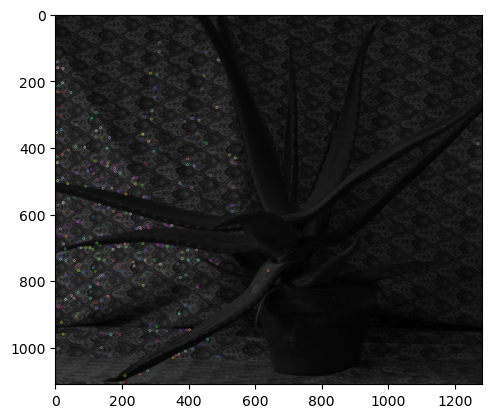

(<matplotlib.image.AxesImage at 0x15ff988b0>, None)

In [26]:
img = cv2.imread('view5.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
img=cv2.drawKeypoints(gray,kp,img)

plt.imshow(img),plt.show()

In [27]:
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

27